In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:

from tensorflow.keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
import glob

In [ ]:
image_directory = '/content/drive/MyDrive/resdata/A'
mask_directory = '/content/drive/MyDrive/cons'

In [ ]:
SIZE = 256




Load images and masks in order so they match

In [ ]:


image_names = glob.glob("/content/drive/MyDrive/resdata/A/*.png")
print(image_names)

['/content/drive/MyDrive/resdata/A/10.png', '/content/drive/MyDrive/resdata/A/9.png', '/content/drive/MyDrive/resdata/A/5.png', '/content/drive/MyDrive/resdata/A/3.png', '/content/drive/MyDrive/resdata/A/2.png', '/content/drive/MyDrive/resdata/A/6.png', '/content/drive/MyDrive/resdata/A/4.png', '/content/drive/MyDrive/resdata/A/8.png', '/content/drive/MyDrive/resdata/A/1.png', '/content/drive/MyDrive/resdata/A/7.png', '/content/drive/MyDrive/resdata/A/11.png', '/content/drive/MyDrive/resdata/A/23.png', '/content/drive/MyDrive/resdata/A/19.png', '/content/drive/MyDrive/resdata/A/24.png', '/content/drive/MyDrive/resdata/A/27.png', '/content/drive/MyDrive/resdata/A/12.png', '/content/drive/MyDrive/resdata/A/18.png', '/content/drive/MyDrive/resdata/A/28.png', '/content/drive/MyDrive/resdata/A/21.png', '/content/drive/MyDrive/resdata/A/20.png', '/content/drive/MyDrive/resdata/A/13.png', '/content/drive/MyDrive/resdata/A/16.png', '/content/drive/MyDrive/resdata/A/29.png', '/content/drive/MyD

In [ ]:

image_names.sort()
print(image_names)

['/content/drive/MyDrive/resdata/A/1.png', '/content/drive/MyDrive/resdata/A/10.png', '/content/drive/MyDrive/resdata/A/100.png', '/content/drive/MyDrive/resdata/A/101.png', '/content/drive/MyDrive/resdata/A/102.png', '/content/drive/MyDrive/resdata/A/103.png', '/content/drive/MyDrive/resdata/A/104.png', '/content/drive/MyDrive/resdata/A/105.png', '/content/drive/MyDrive/resdata/A/106.png', '/content/drive/MyDrive/resdata/A/107.png', '/content/drive/MyDrive/resdata/A/108.png', '/content/drive/MyDrive/resdata/A/109.png', '/content/drive/MyDrive/resdata/A/11.png', '/content/drive/MyDrive/resdata/A/110.png', '/content/drive/MyDrive/resdata/A/111.png', '/content/drive/MyDrive/resdata/A/112.png', '/content/drive/MyDrive/resdata/A/113.png', '/content/drive/MyDrive/resdata/A/114.png', '/content/drive/MyDrive/resdata/A/115.png', '/content/drive/MyDrive/resdata/A/116.png', '/content/drive/MyDrive/resdata/A/117.png', '/content/drive/MyDrive/resdata/A/118.png', '/content/drive/MyDrive/resdata/A/1

In [ ]:
image_names_subset = image_names[0:841]

In [ ]:



images = [cv2.imread(img,0) for img in image_names_subset]

In [ ]:
image_dataset = np.array(images)
image_dataset = np.expand_dims(image_dataset, axis = 3)
print(image_dataset.shape)

(840, 256, 256, 1)


Read masks the same way.

In [ ]:
mask_names = glob.glob("/content/drive/MyDrive/cons/*.png")
mask_names.sort()
mask_names_subset = mask_names[0:841]
masks = [cv2.imread(mask, 0) for mask in mask_names_subset]
mask_dataset = np.array(masks)
import cv2
import numpy as np

# Define threshold parameters
threshold_value = 127
max_value = 255
threshold_type = cv2.THRESH_BINARY
"""
# Threshold the entire mask dataset
thresholded_masks = np.zeros_like(mask_dataset)
for i in range(mask_dataset.shape[0]):
    _, thresholded_masks[i] = cv2.threshold(mask_dataset[i], threshold_value, max_value, threshold_type)


print(mask_dataset.shape)
"""

'\n# Threshold the entire mask dataset\nthresholded_masks = np.zeros_like(mask_dataset)\nfor i in range(mask_dataset.shape[0]):\n    _, thresholded_masks[i] = cv2.threshold(mask_dataset[i], threshold_value, max_value, threshold_type)\n\nmask_dataset = np.expand_dims(mask_dataset, axis = 3)\nprint(mask_dataset.shape)\n'

In [ ]:
mask_dataset = np.expand_dims(mask_dataset, axis = 3)

In [ ]:
print("Image data shape is: ", image_dataset.shape)
print("Mask data shape is: ", mask_dataset.shape)
print("Max pixel value in image is: ", image_dataset.max())
print("Labels in the mask are : ", np.unique(mask_dataset))

Image data shape is:  (840, 256, 256, 1)
Mask data shape is:  (840, 256, 256, 1)
Max pixel value in image is:  255
Labels in the mask are :  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211

In [ ]:
#scaler = MinMaxScaler()

In [ ]:
#test_image_data=scaler.fit_transform(image_dataset_uint8.reshape(-1, image_dataset_uint8.shape[-1])).reshape(image_dataset_uint8.shape)

In [ ]:



#Normalize images
image_dataset = image_dataset /255.  #Can also normalize or scale using MinMax scaler
#Do not normalize masks, just rescale to 0 to 1.
mask_dataset = mask_dataset /255.  #PIxel values will be 0 or 1

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.10)


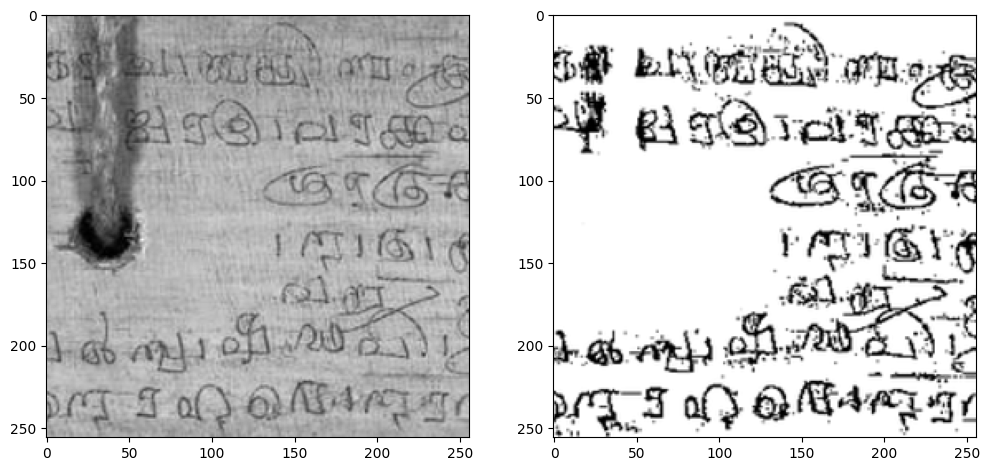

In [ ]:

#Sanity check, view few mages
import random

image_number = random.randint(0, len(X_train)-1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,:,:,0], cmap='gray')
plt.subplot(122)
plt.imshow(y_train[image_number,:,:,0], cmap='gray')
plt.show()

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate, AveragePooling2D
import tensorflow as tf
def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  
    x = Activation("relu")(x)

    return x

def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPooling2D((2, 2))(x)
    return x, p   


def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=(2, 2), padding='same')(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def pyramid_pooling_block(input, pool_sizes=[1, 2, 3, 6]):
    features = []
    input_shape = input.shape
    for pool_size in pool_sizes:
        x = AveragePooling2D(pool_size, strides=1, padding='same')(input)
        x = Conv2D(input_shape[-1], 1, padding='same')(x)
        x = Lambda(lambda x: tf.image.resize(x, input_shape[1:3]))(x)
        features.append(x)
    features.append(input)
    x = Concatenate()(features)
    return x

def build_pspnet(input_shape, n_classes):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024) 

    psp = pyramid_pooling_block(b1)

    d1 = decoder_block(psp, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    if n_classes == 1:  
        activation = 'sigmoid'
    else:
        activation = 'softmax'

    outputs = Conv2D(n_classes, 1, padding="same", activation=activation)(d4)  

    model = Model(inputs, outputs, name="PSPNet")
    return model


In [ ]:
input_shape = (256, 256, 1)

In [ ]:
#DICE SCORE IS A GOOD METRIC FOR SEGMENTATION SO I WILL USE IT AS A CUSTOM METRIC FOR TRAINING
import tensorflow.keras.backend as K
smooth = 1.
def dice_score(y_true, y_pred):
    smooth = 1.
    # masks
    y_true_fm = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_fm * y_pred_f)
    score = (2. * intersection + smooth) / (K.sum(y_true_fm) + K.sum(y_pred_f) + smooth)
    return score

def dice_loss(y_true, y_pred):
    loss = 1 - dice_score(y_true, y_pred)
    return loss

In [ ]:

model = build_pspnet(input_shape,1)
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss=dice_loss)



In [ ]:

%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the model checkpoint callback to save only the model weights
checkpoint = ModelCheckpoint('re4501.h5', save_best_only=True)

# Train the model and save only the model weights at the best epoch
history = model.fit(X_train, y_train, batch_size=1, verbose=2, epochs=5,
                    validation_data=(X_test, y_test), shuffle=False,
                    callbacks=[checkpoint])


Epoch 1/5
756/756 - 64s - loss: 0.0325 - dice_score: 0.9675 - accuracy: 0.7640 - val_loss: 0.0413 - val_dice_score: 0.9587 - val_accuracy: 0.7368 - 64s/epoch - 85ms/step
Epoch 2/5
756/756 - 38s - loss: 0.0264 - dice_score: 0.9736 - accuracy: 0.7704 - val_loss: 0.0323 - val_dice_score: 0.9677 - val_accuracy: 0.7414 - 38s/epoch - 50ms/step
Epoch 3/5
756/756 - 38s - loss: 0.0257 - dice_score: 0.9743 - accuracy: 0.7709 - val_loss: 0.0303 - val_dice_score: 0.9697 - val_accuracy: 0.7432 - 38s/epoch - 50ms/step
Epoch 4/5
756/756 - 38s - loss: 0.0253 - dice_score: 0.9747 - accuracy: 0.7712 - val_loss: 0.0298 - val_dice_score: 0.9702 - val_accuracy: 0.7431 - 38s/epoch - 50ms/step
Epoch 5/5
756/756 - 38s - loss: 0.0252 - dice_score: 0.9748 - accuracy: 0.7712 - val_loss: 0.0289 - val_dice_score: 0.9711 - val_accuracy: 0.7438 - 38s/epoch - 50ms/step


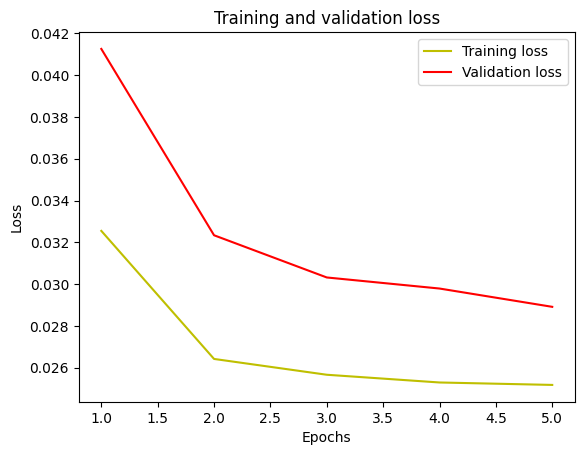

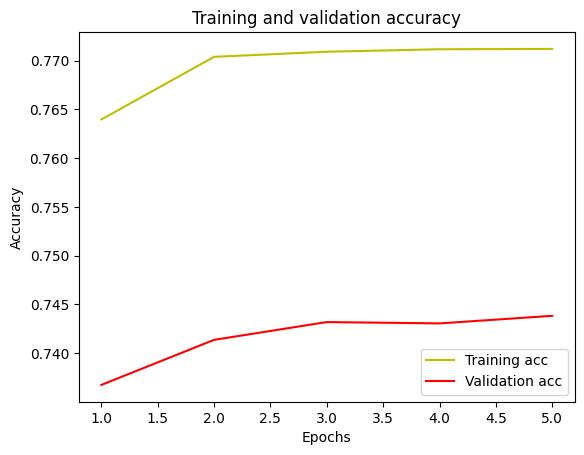

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:

#IOU
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

3/3 [==============================] - 12s 2s/step


In [ ]:


from tensorflow.keras.metrics import MeanIoU

In [ ]:
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(y_pred_thresholded, y_test)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.5565647


(1, 256, 256, 1)
1/1 [==============================] - 0s 23ms/step
(256, 256)


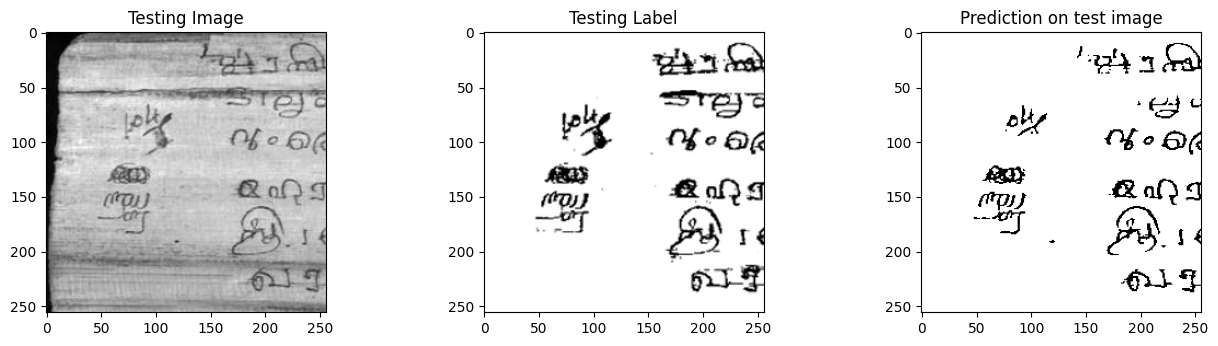

In [ ]:
import random
threshold = 0.5
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
print(prediction.shape)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()

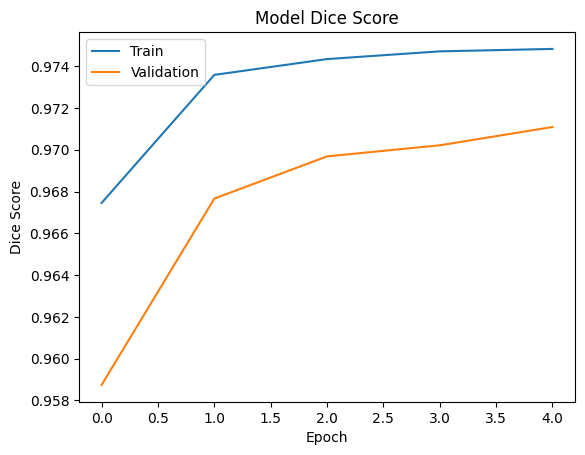

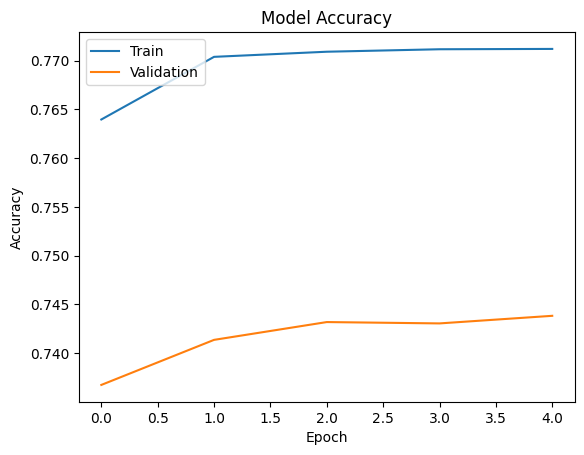

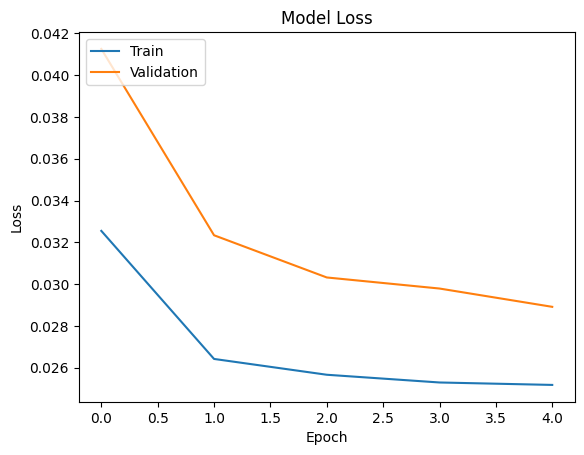

In [ ]:
# plot the dice_score during training
plt.plot(history.history['dice_score'])
plt.plot(history.history['val_dice_score'])
plt.title('Model Dice Score')
plt.ylabel('Dice Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('resdice_score.png')
plt.show()

# plot the accuracy during training
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('resaccuracy.png')
plt.show()

# plot the loss during training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('resunetloss.png')
plt.show()


In [ ]:
import cv2
import numpy as np
import os
import tensorflow as tf

# Load the ResUNet model architecture
model = tf.keras.models.load_model('/content/drive/MyDrive/pspnet.h5', compile=False)

# Load the model weights from the h5 file
model.load_weights('/content/drive/MyDrive/pspnet.h5')

# Define the input and output directories
input_dir = '/content/drive/MyDrive/resdata/A/'
output_dir = '/content/drive/MyDrive/bad1'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Iterate over the input images
for filename in os.listdir(input_dir):
    # Load the input image
    input_path = os.path.join(input_dir, filename)
    input_image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
    input_image = cv2.resize(input_image, (256, 256))
    input_image = input_image / 255.0 # normalize pixel values

    # Make a prediction with the model
    prediction = model.predict(np.array([input_image]))

    # Convert the output to an image
    output_image = np.squeeze(prediction) # remove the batch dimension
    output_image = (output_image * 255).astype(np.uint8) # scale pixel values back to 0-255 range

    # Save the output image
    output_path = os.path.join(output_dir, filename)
    cv2.imwrite(output_path, output_image)


1/1 [==============================] - 0s 36ms/step


In [ ]:

import os
import re
folder_path ='/content/drive/MyDrive/result'
file_names = []

for file_name in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, file_name)):
        file_names.append(file_name)
def split_name(name):
    match = re.match(r"([0-9]+)(\D*)", name)
    return (int(match.group(1)), match.group(2))

sorted_names = sorted(file_names, key=split_name)
print(sorted_names)


['1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png', '30.png', '31.png', '32.png', '33.png', '34.png', '35.png', '36.png', '37.png', '38.png', '39.png', '40.png', '41.png', '42.png', '43.png', '44.png', '45.png', '46.png', '47.png', '48.png', '49.png', '50.png', '51.png', '52.png', '53.png', '54.png', '55.png', '56.png', '57.png', '58.png', '59.png', '60.png', '61.png', '62.png', '63.png', '64.png', '65.png', '66.png', '67.png', '68.png', '69.png', '70.png', '71.png', '72.png', '73.png', '74.png', '75.png', '76.png', '77.png', '78.png', '79.png', '80.png', '81.png', '82.png', '83.png', '84.png', '85.png', '86.png', '87.png', '88.png', '89.png', '90.png', '91.png', '92.png', '93.png', '94.png', '95.png', '96.png', '97.png', '98.png', '99.png', '100.png', '101.pn

In [ ]:
import os
from PIL import Image

input_folder = '/content/drive/MyDrive/result'
output_folder = '/content/drive/MyDrive/resultcombined'

if not os.path.exists(output_folder):
  os.makedirs(output_folder)
# Get a list of all the image file names in the input folder
image_names = sorted_names

# Create a list of image name groups, each containing 7 image names
image_name_groups = [image_names[i:i+7] for i in range(0, len(image_names), 7)]

# Combine the images in each group into a single image
count = 1
for group in image_name_groups:
    # Create a new blank image to combine the patches into
    patch_mode = Image.open(os.path.join(input_folder, group[0])).mode
    result = Image.new(patch_mode, (1792, 256))

    # Combine the patches into the result image
    for i, image_name in enumerate(group):
        patch_path = os.path.join(input_folder, image_name)
        patch = Image.open(patch_path)
        result.paste(patch, (i*256, 0))

    # Save the result image to the output folder
    output_path = os.path.join(output_folder, f'{count}.png')
    result.save(output_path)

    count += 1